<a href="https://colab.research.google.com/github/marialuisaorocha/marialuisaorocha/blob/main/HZN_VINCI_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Análise exploratória de dados**





###Importação das bibliotecas necessárias

In [ ]:
# Importação de bibliotecas
import base64
import datetime
import json
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sl

from sqlalchemy import create_engine, text

### Acessando o banco de dados

In [ ]:
db_user = 'postgres'
db_pass = '#HZNprivate2020'
db_host = 'db-hzn-dados-abertos.capdohzudomg.sa-east-1.rds.amazonaws.com'
db_name = 'postgres'

engine=create_engine(f'postgresql://{db_user}:{db_pass}@{db_host}/{db_name}', max_overflow=20)

def runQuery(sql):
    result = engine.connect().execution_options(isolation_level="AUTOCOMMIT").execute((text(sql)))
    return pd.DataFrame(result.fetchall(), columns=result.keys())

### Filtros de CNPJs baseados no CNAE

**1. Código CNAE:** [4789004](https://concla.ibge.gov.br/busca-online-cnae.html?subclasse=4789004&view=subclasse)
**Descrição:** Comércio varejista de animais vivos e de artigos e alimentos para animais de estimação.

O código abaixo faz uma busca de raízes de CNPJs que possuam relação com o  CNAE **4789004**, não incluíndo dados repetidos.




In [ ]:
runQuery("""
select count(distinct SUBSTRING(cnpj, 1, 8))  
from empresa 
where cnae_fiscal = 4789004;
""")

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



KeyboardInterrupt: ignored

 Output: **161.831** empresas. 

**2. Código CNAE:** [9609208](https://concla.ibge.gov.br/busca-online-cnae.html?subclasse=9609208&view=subclasse)
**Descrição:** Higiene e embelezamento de animais domésticos.

O código abaixo faz uma busca de raízes de CNPJs que possuam relação com o  CNAE **9609208**, não incluíndo dados repetidos.

In [ ]:
runQuery("""
select count(distinct SUBSTRING(cnpj, 1,8)) 
from empresa 
where cnae_fiscal = 9609208;
""")

Output: **61.186** empresas.

**3. Código CNAE:** [4771704](https://concla.ibge.gov.br/busca-online-cnae.html?subclasse=4771704&tipo=cnae&versao=7&view=subclasse)
**Descrição:** Comércio varejista de medicamentos veterinários.

O código abaixo faz uma busca de raízes de CNPJs que possuam relação com o CNAE **4771704**, não incluíndo dados repetidos.

In [ ]:
runQuery("""
select count(distinct SUBSTRING(cnpj, 1, 8))  
from empresa 
where cnae_fiscal = 4771704;
""")

Output: **33.274** empresas.

### É possível consultar mais de um CNAE para analisar os dados:

Neste código foram usados 2 tipos de CNAE que envolvem a área de cuidados veterinários e higiênicos dos animais. 

In [ ]:
runQuery("""
select count(distinct SUBSTRING(cnpj, 1, 8))  
from empresa 
where cnae_fiscal = 4771704 or cnae_fiscal = 9609208;
""")

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



KeyboardInterrupt: ignored

Output: **94.436** empresas. 

# **Comparação das top 50 com os CNAE escolhidos.**

Consulta feita com o CNAE **4623109** para encontrar as top 50 da revista.

In [ ]:
runQuery("""
-- Encontrar os CNPJS da revista que possuam o seguinte CNAE
select razao_social, cnae_fiscal, cnpj 
from empresa
where cnae_fiscal = 4623109
and cnpj 
in (select cnpj from revista); -- 3 resultados
""")


razao_social  cnae_fiscal            cnpj
0  BANDEIRANTES COMERCIO DE RACOES LTDA      4623109  19676776003099
1      AGROSOLO BAURU AGROPECUARIA LTDA      4623109  66529363000127
2              CENTRAL DE RACOES EIRELI      4623109  05262215000102

Output: 3 resultados.



---



Consulta feita com o CNAE **4789004** para encontrar as top 50 da revista.

In [ ]:
runQuery("""
select razao_social, nome_fantasia , cnae_fiscal, cnpj 
from empresa
where cnae_fiscal = 4789004
and cnpj 
in (select cnpj from revista); -- 31 resultados
""")


razao_social  ...            cnpj
0      BRASIL PET COMERCIO E SERVICOS DE PET SHOP S/A  ...  18745792000199
1         TCM COMERCIO DE PRODUTOS AGROPECUARIOS LTDA  ...  18639285000170
2     VIDA PRODUTOS AGROPECUARIOS E VETERINARIOS LTDA  ...  37088556000191
3                                  PET DOG INBOX LTDA  ...  19534235000191
4                             AGROMIX PET CENTER LTDA  ...  06336990000462
5                    ANIMALE COMERCIO & SERVICOS LTDA  ...  05032158000167
6   UNIVERSO PET COMERCIO DE PRODUTOS E SERVICOS V...  ...  22458432000183
7                   RN PET COMERCIO E SERVICOS EIRELI  ...  15674572000557
8   B LOUREIRO PORTELA COMERCIO DE ARTIGOS PARA PE...  ...  05538613000109
9                           CONSULADO DA RACAO EIRELI  ...  19308884000174
10                               DOGS DAY RACOES LTDA  ...  04371963000152
11     PET MAXI COMERCIO DE ARTIGOS PARA ANIMAIS LTDA  ...  07047427000194
12                               ALAN MARCEL FONTOLAN  ...  14952126000170
13                AGROPECUARIA DO MANE COMERCIAL LTDA  ...  67053447000108
14  AGROVERDE S.R. COMERCIO DE RACOES E PRODUTOS V...  ...  71834089000130
15                           LUIZ BASETTO & CIA. LTDA  ...  46059051000190
16  PARANIMAIS COMERCIO DE PRODUTOS PARA ANIMAIS E...  ...  00811671000132
17                      MARCIO JOSE CONTATO RIO CLARO  ...  00303093000123
18  PET CAMP - COMERCIO DE PRODUTOS AGROPECUARIOS ...  ...  01849558000885
19      MORIKAWA COMERCIO DE RACOES E IMPORTACAO LTDA  ...  05886844000103
20   A CASA DO BICHO BARRA PRODUTOS PARA ANIMAIS LTDA  ...  18534401000197
21                   VETERINARIA FLORA MERCANTIL LTDA  ...  17009911000182
22                      SUPRAMINAS COMERCIO PET LTDA.  ...  05490135000104
23  PES E PATAS COMERCIO DE RACAO ANIMAL E ACESSOR...  ...  27770720000192
24     REAL-PET SHOP E PRODUTOS AGROVETERINARIOS LTDA  ...  06878489000185
25      W3 PF1 COMERCIO DE PRODUTOS VETERINARIOS LTDA  ...  40396962000126
26                        AGRO AVES AGROPECUARIA LTDA  ...  79526059000330
27                     VANIA ALDA DE SOUZA DOS SANTOS  ...  81633638000161
28                           MR AGUIAR PET SHOP LTDA.  ...  17574281000199
29                             HIPERCAO PET SHOP LTDA  ...  12423480000182
30                    REI PET COMERCIO DE RACOES LTDA  ...  13627866000179

[31 rows x 4 columns]

Output: 31 resultados.

# **Identificando as filiais**



> Inserindo os dados das colunas para serem separadas. A intenção é separar somente o primeiro conjunto, como na imagem, para separar o que for diferente das matrizes, ou seja, as filiais.


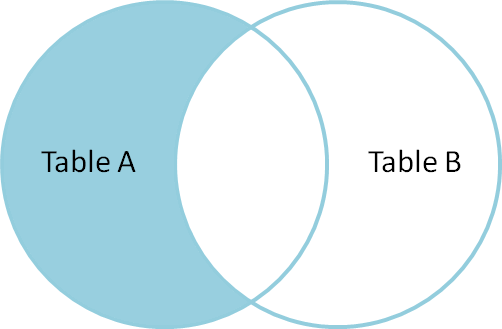

Inserindos os dados em variáveis

In [ ]:
matriz = runQuery("""
select cnpj, razao_social
from empresa 
where    identificador_matriz_filial = 1 and 
  		 situacao_cadastral = 2 and 
  		 cnae_fiscal in ('4623109', '4789004', '5139007', '5249311', '9309202', '9609203', '9609207', '9609208') order by razao_social
""")
matriz.head()

cnpj                       razao_social
0  25293104000162                     011 PET EIRELI
1  24979805000197  021 - PET COMERCIO DE RACOES LTDA
2  28688527000170  040 AGROPECUARIA DO BRASIL EIRELI
3  33064473000101          1001 BICHOS PET SHOP LTDA
4  34442187000103        100% RACOES PET SHOP EIRELI

In [ ]:
matrfilial= runQuery ("""
select cnpj, razao_social
from empresa 
where 	 situacao_cadastral = 2 and 
		 cnae_fiscal in ('4623109', '4789004', '5139007', '5249311', '9309202', '9609203', '9609207', '9609208') order by razao_social
	
""")
matrfilial.head()

cnpj                       razao_social
0  25293104000243                     011 PET EIRELI
1  25293104000162                     011 PET EIRELI
2  24979805000197  021 - PET COMERCIO DE RACOES LTDA
3  28688527000170  040 AGROPECUARIA DO BRASIL EIRELI
4  33064473000101          1001 BICHOS PET SHOP LTDA

Iniciando o merge entre as tabelas

In [ ]:
dif = pd.merge(left=matrfilial, right=matriz, on='cnpj', how='left')
dif

cnpj  ...                               razao_social_y
0       25293104000243  ...                                          NaN
1       25293104000162  ...                               011 PET EIRELI
2       24979805000197  ...            021 - PET COMERCIO DE RACOES LTDA
3       28688527000170  ...            040 AGROPECUARIA DO BRASIL EIRELI
4       33064473000101  ...                    1001 BICHOS PET SHOP LTDA
...                ...  ...                                          ...
156085  11422079000165  ...        ZUM CAO PET SHOP E ACESSORIOS  EIRELI
156086  18654108000163  ...                   ZUMILDO CELESTINO DA SILVA
156087  32822221000131  ...  ZUPPET COMERCIO DE ARTIGOS DE PET SHOP LTDA
156088  23656086000100  ...                ZUTILEA CAMARGO DE SOUZA LAGE
156089  31625113000106  ...                  ZUTTO PET HOME CENTER LTDA.

[156090 rows x 3 columns]

# **Resultado dos CNPJs de filiais**

Utilizando o comando `drop._duplicates` foi possível tirar todos os CNPJs repetidos com a segunda tabela (tabela de matrizes), deixando somente o excesso, que são as filiais. 

In [ ]:
filiais = pd.concat([matriz,matrfilial]).drop_duplicates(keep=False)

cnpj                                       razao_social
0       25293104000243                                     011 PET EIRELI
10      32159667000470  12 DE SETEMBRO AGROPECUARIA INCO E EMPREENDIME...
27      05865507000202                             365 CASA DA RACAO LTDA
68      11794031000269                              A. A. DE ASSIS RACOES
81      17544345000290                             A A J E TOGEIRO GALVAO
...                ...                                                ...
155971  06089723000276                          ZOOBOTICA PET SHOP EIRELI
155976  04177319000229               ZOO CENTER - COMERCIO DE RACOES LTDA
155983  04911765000487                     ZOO FLORA NUTRICAO ANIMAL LTDA
155991  06927620000238        ZOO LOGICA PET SHOP COMERCIO DE RACOES LTDA
156010  07277611000392  ZOOPLANCTON VIDA AQUATICA PEIXES ORNAMENTAIS LTDA

[3493 rows x 2 columns]

In [ ]:
empresas_pet= runQuery("""
select * from empresas_pet;
""")
empresas_pet.head()

cnpj  ...  data_situacao_especial
0  00002480000120  ...                    None
1  00005252000103  ...                    None
2  00004639000145  ...                    None
3  00008148000172  ...                    None
4  00014015000109  ...                    None

[5 rows x 32 columns]

# **Gráficos**

Importanto bibliotecas para os gráficos e instalando o pandas profiling

In [ ]:
!pip install -U pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(empresas_pet, title='Profiling',html={'style':{'full_width':True}})

In [ ]:
profile.to_notebook_iframe()


Text(0.5, 1.0, 'Quantidade de Pet Shops por Estado')

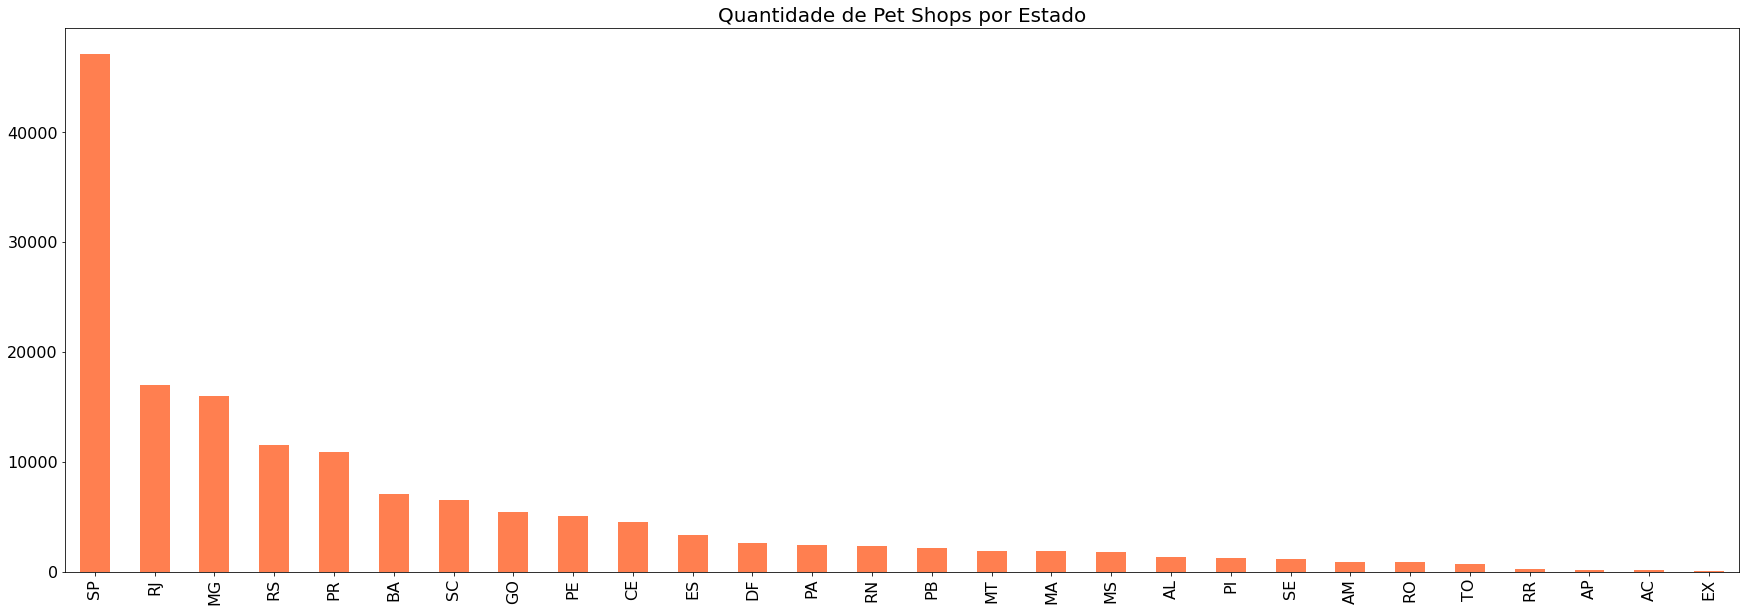

In [ ]:
fig1 = empresas_pet['uf'].value_counts().plot(kind = 'bar', figsize=(30,10), fontsize= 16, color='coral')

fig1.set_title('Quantidade de Pet Shops por Estado', fontsize=20)

Text(0.5, 1.0, 'Quantidade de empresas por código CNAE')

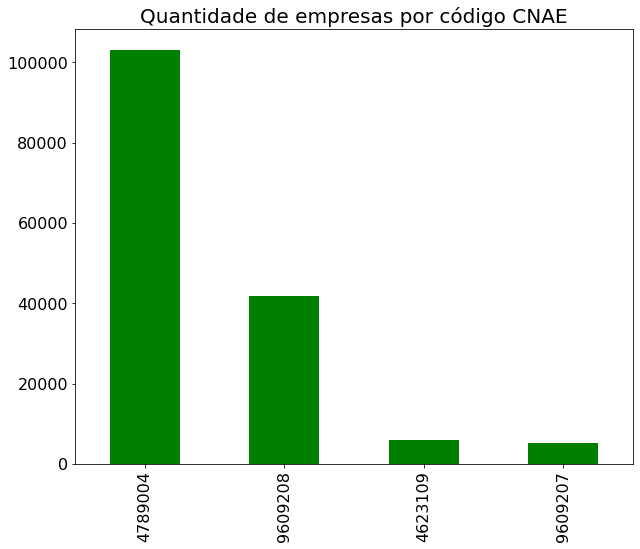

In [ ]:
fig2 = empresas_pet['cnae_fiscal'].value_counts().plot(kind = 'bar', figsize=(10,8), fontsize= 16, color='green')

fig2.set_title('Quantidade de empresas por código CNAE', fontsize=20)



> **4789004** = Comércio varejista de animais vivos e de artigos e alimentos para animais de estimação

> **9609208** = Higiene e embelezamento de animais domésticos

> **4623109** = Comércio atacadista de alimentos para animais

> **9609207** = Alojamento de animais domésticos



Text(0.5, 1.0, 'Portes das empresas')

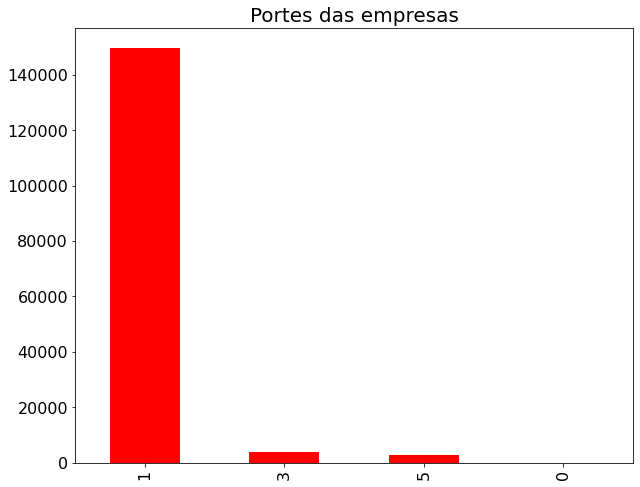

In [ ]:
fig3 = empresas_pet['porte'].value_counts().plot(kind = 'bar', figsize=(10,8), fontsize= 16, color='red')

fig3.set_title('Portes das empresas', fontsize=20)

0. **Não informado**
1. **Micro empresa**
3. **Pequeno porte**
5. **Demais**






# **Gráficos feitos no Qlik Sense**

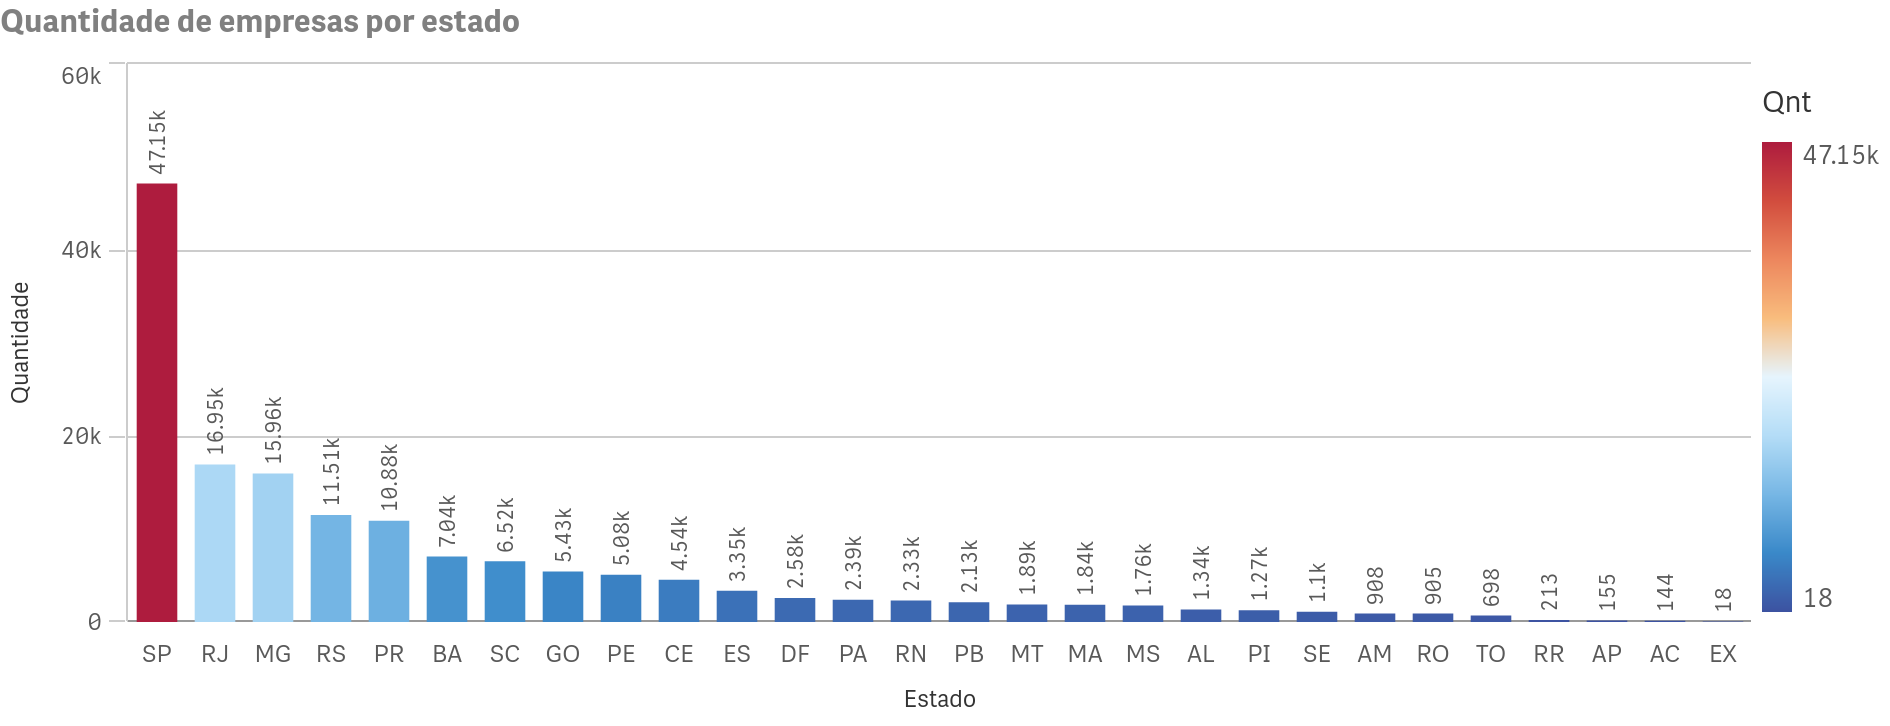

**Quantidade de empresas que seguem determinado serviço CNAE**




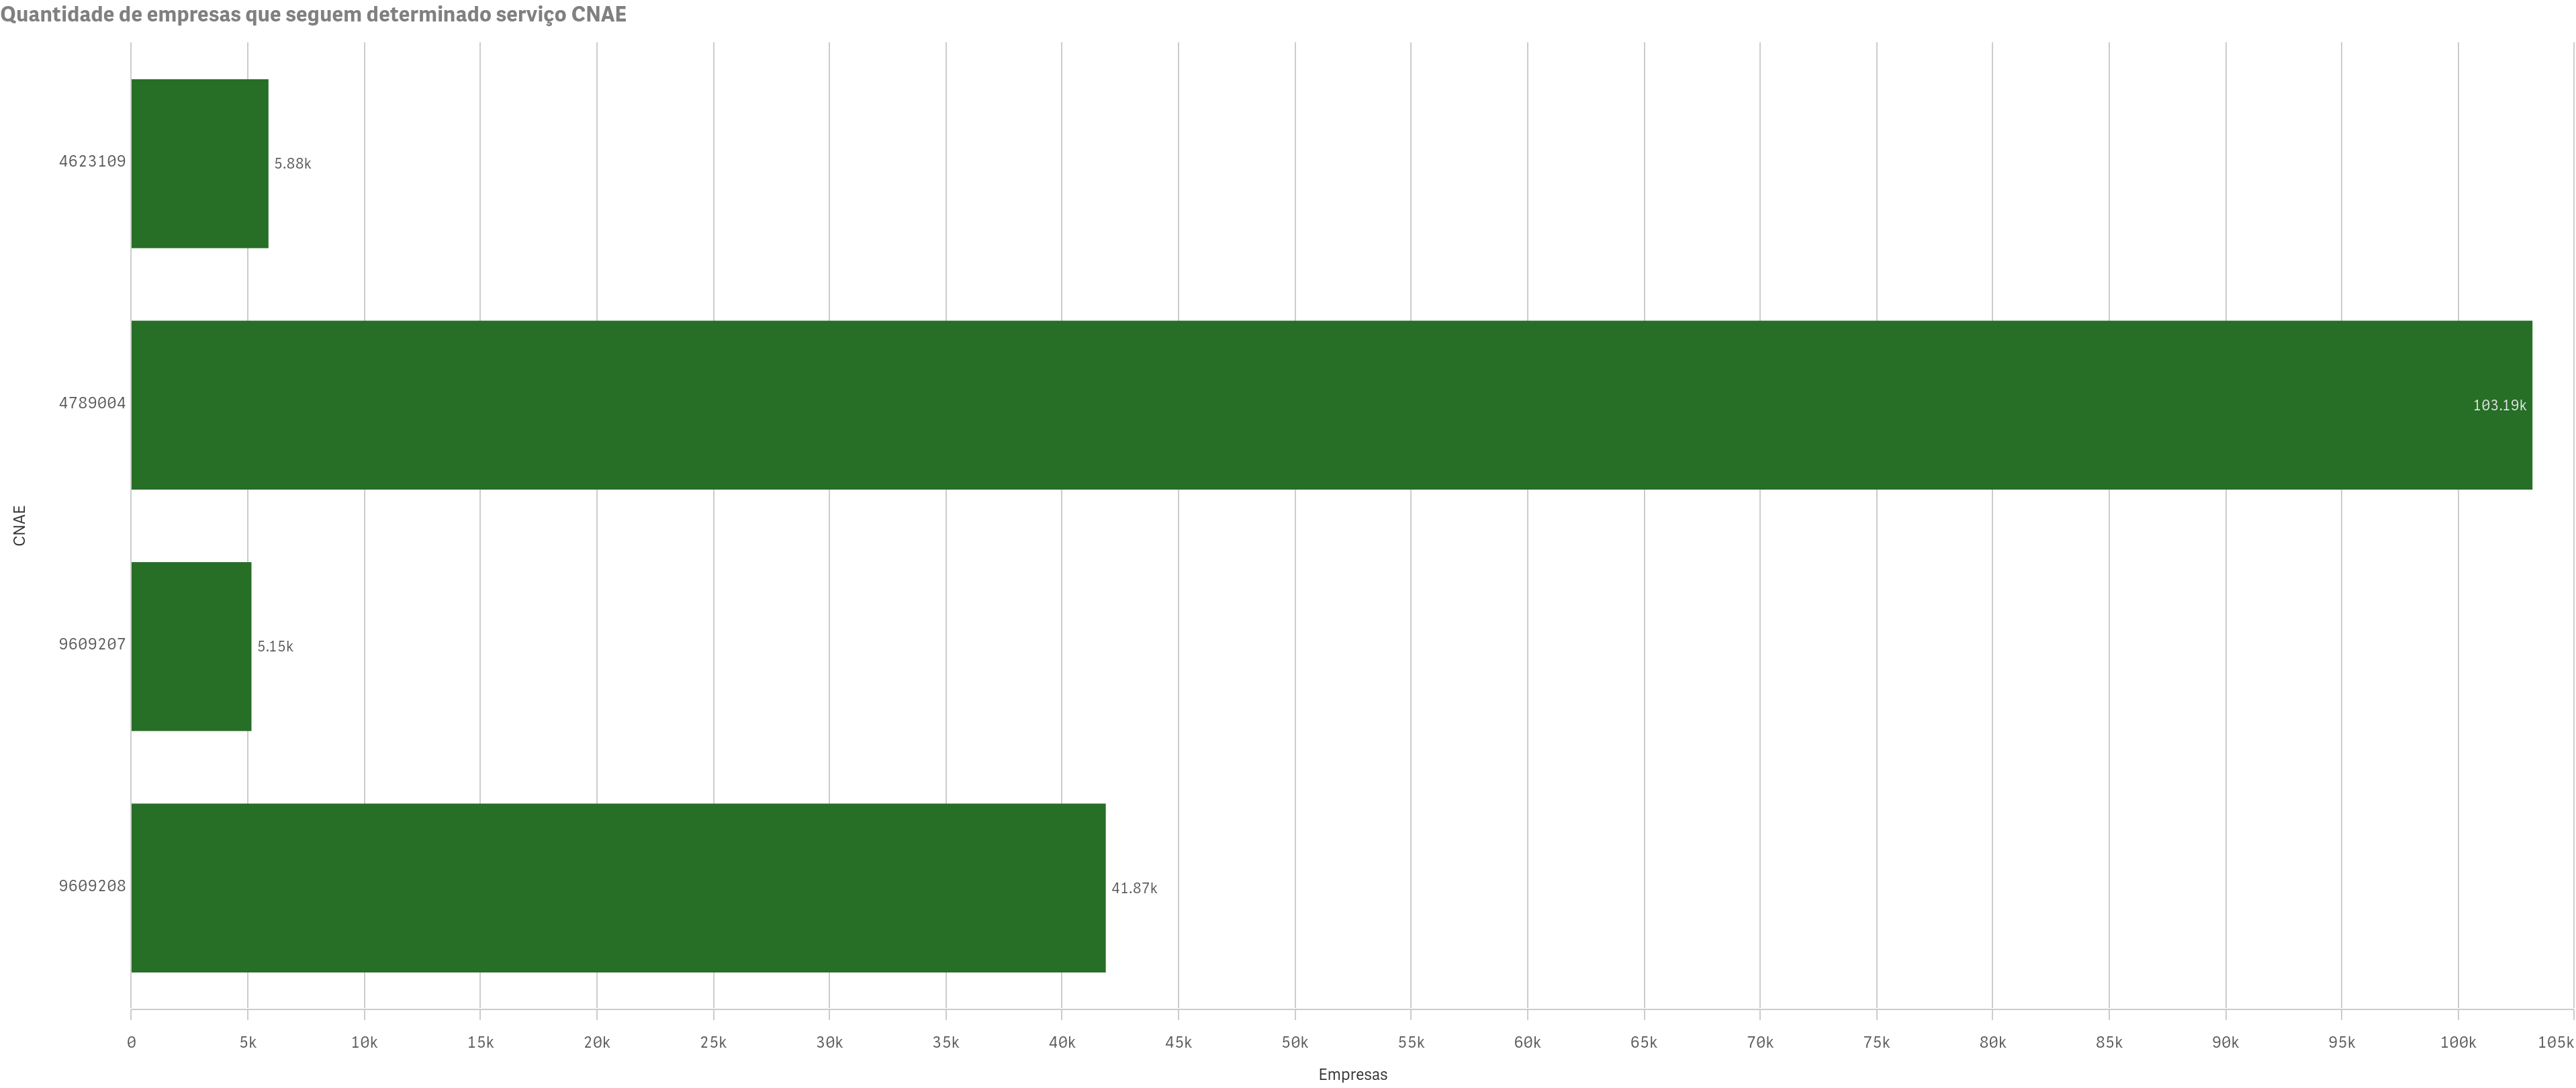

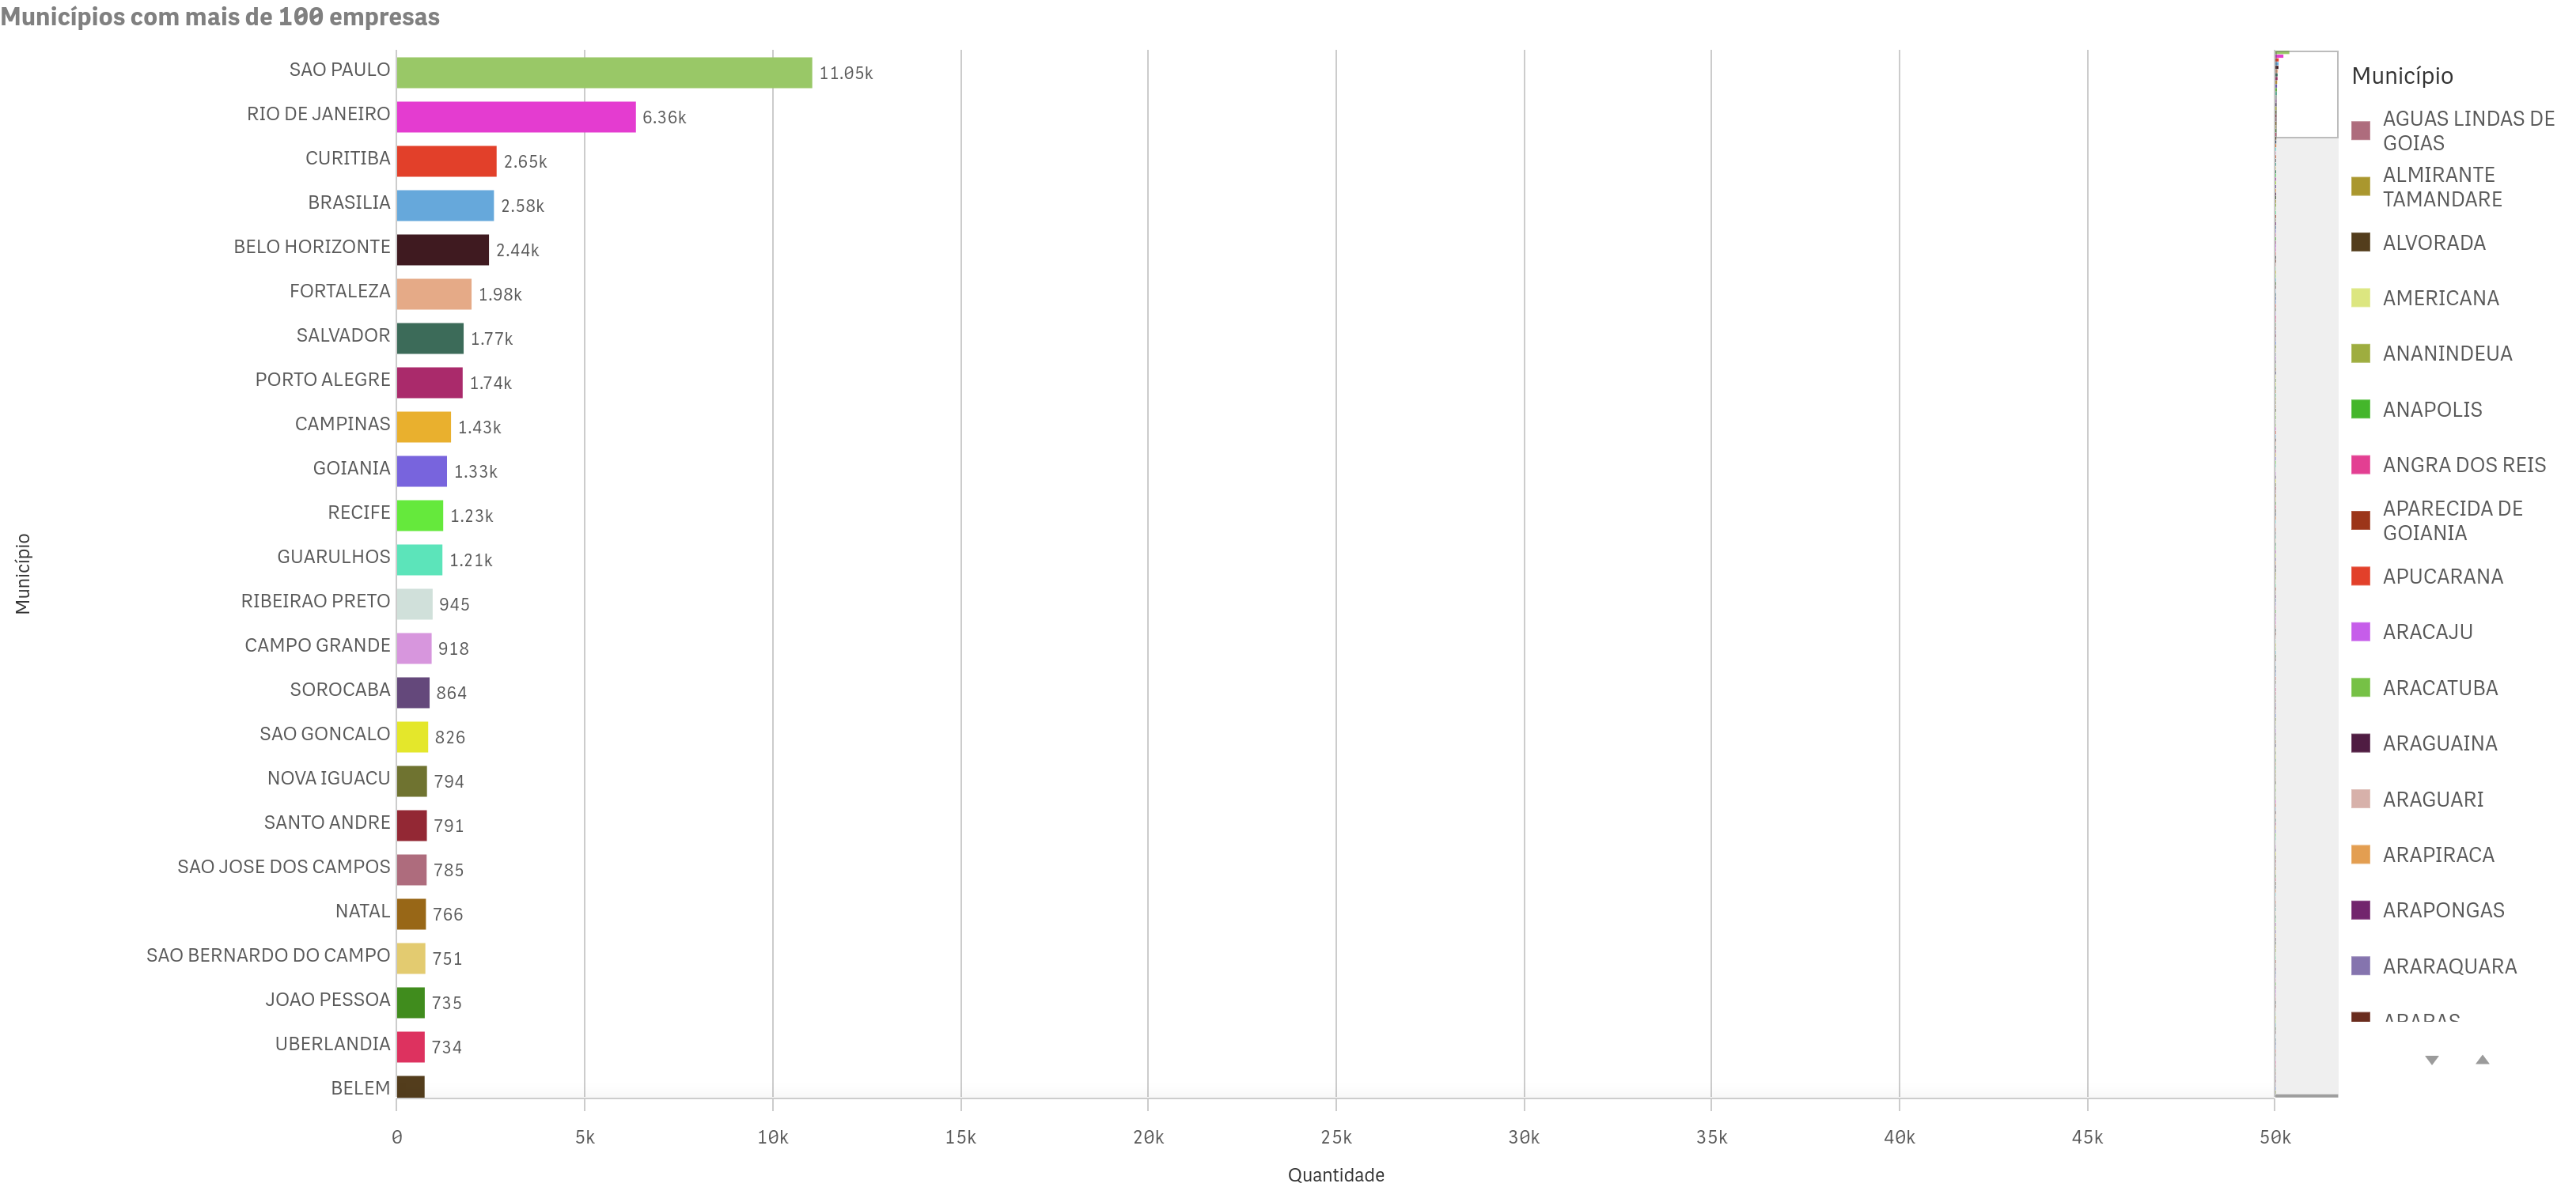

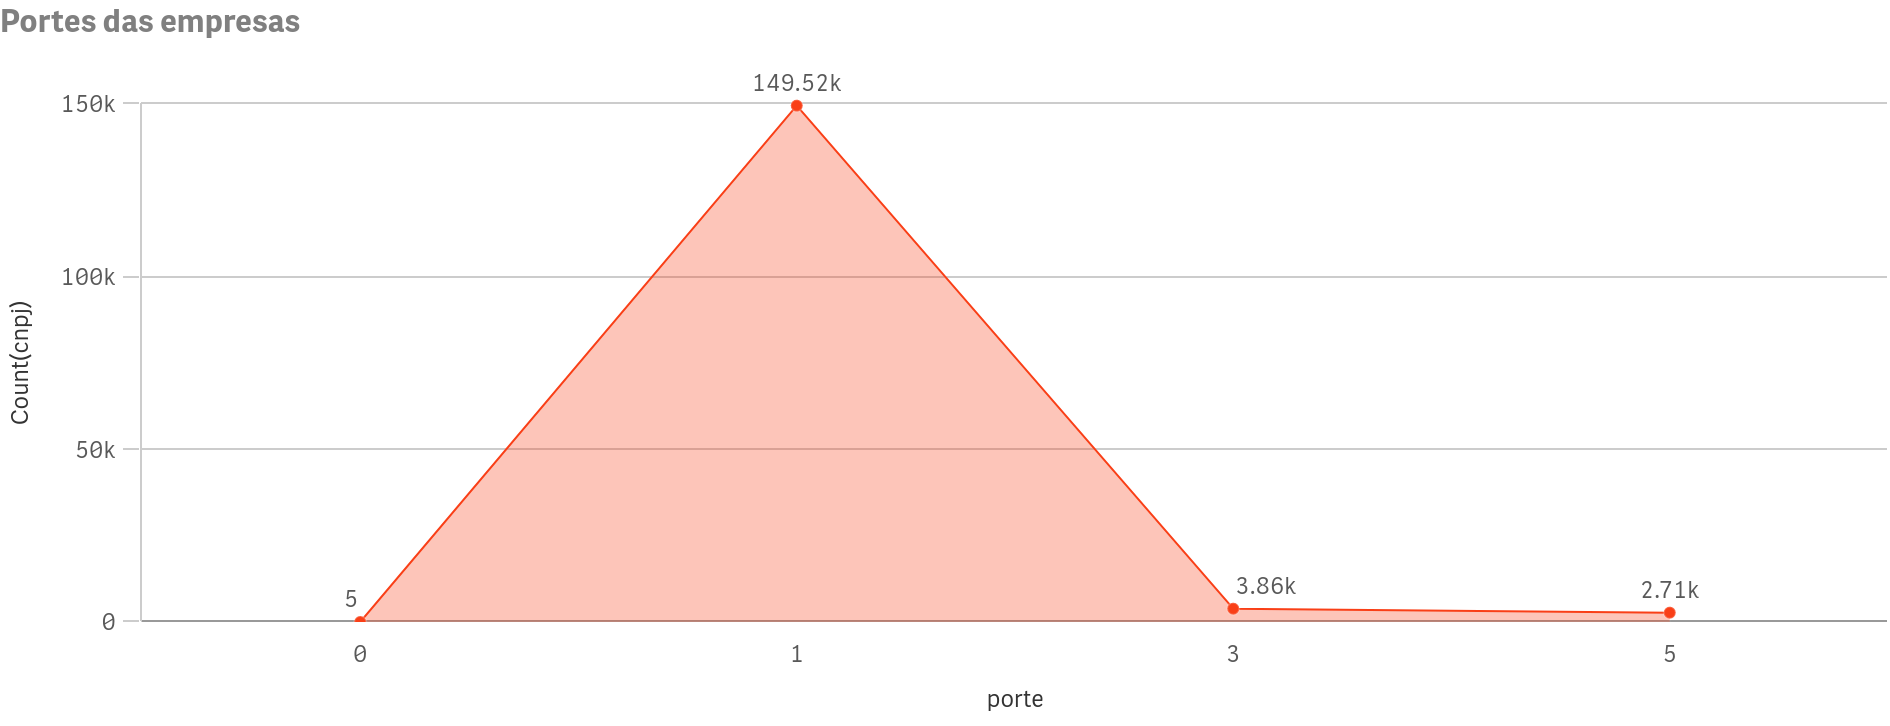